In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

**Read the Data**

In [3]:
df=pd.read_csv("run_or_walk.csv")

In [4]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [5]:
df.shape

(88588, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


**Dropping date time and username column**

In [7]:
df = df.iloc[:,3:]

In [8]:
df.head()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [9]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


**Checking Null Values**

In [10]:
df.isnull().sum()

wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

**Checking Outliers**

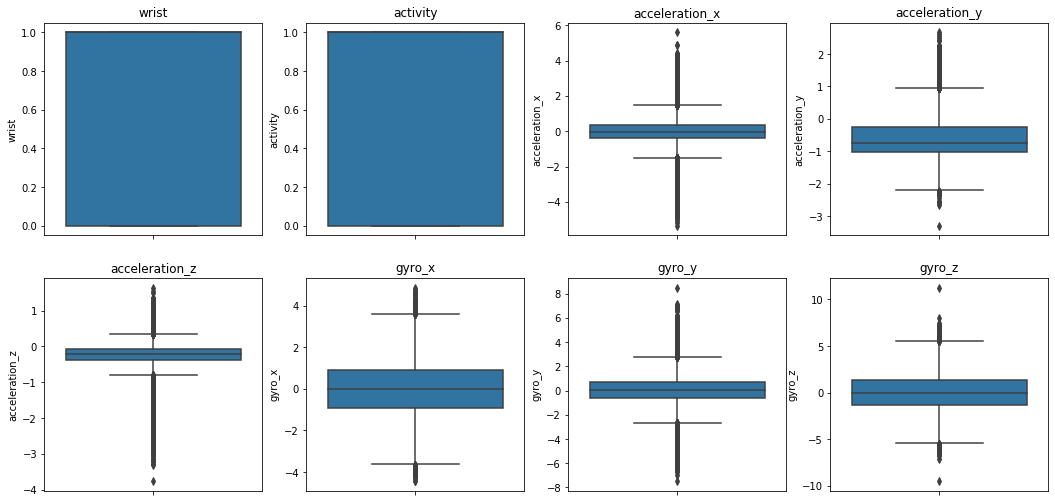

In [11]:
plt.figure(figsize=(18,18))
i=1
for x in df.columns:
    plt.subplot(4,4,i)
    sns.boxplot(y=df[x])
    plt.title(x)
    i+=1

**Visualization**

In [12]:
df1=df.copy()

In [13]:
df1.activity=df1.activity.map({0:'Walking',1:'Running'})
df1.wrist=df1.wrist.map({0:'Left',1:'Right'})

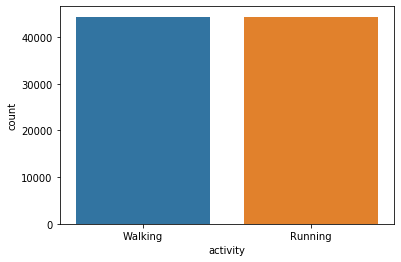

In [15]:
sns.countplot(df1.activity)
plt.show()

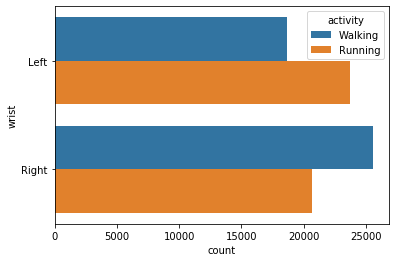

In [17]:
sns.countplot(y=df1.wrist,hue=df1.activity)
plt.show()

Dropping wrist column as it is not that importan

In [18]:
df.drop('wrist',axis=1,inplace=True)

In [19]:
df['total_acceleration'] = np.sqrt((df.acceleration_x)**2 + (df.acceleration_y)**2 + (df.acceleration_z)**2)

In [21]:
act_df = df.groupby([df1.activity])['total_acceleration'].agg({'mean','max'})
act_df

,mean,max
activity,,
Running,1.451963,5.737757
Walking,1.076322,2.182478


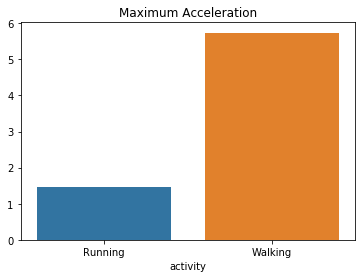

In [22]:
sns.barplot(y=act_df.max(),x=act_df.index)
plt.title('Maximum Acceleration')
plt.show()

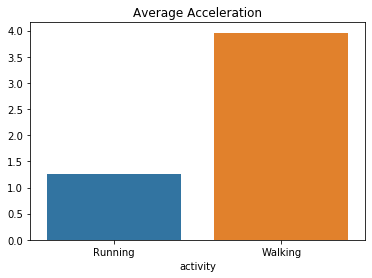

In [23]:
sns.barplot(y=act_df.mean(),x=act_df.index)
plt.title('Average Acceleration')
plt.show()

In [24]:
df

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,total_acceleration
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.825148
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1.329887
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1.547307
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.871729
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1.048889
...,...,...,...,...,...,...,...,...
88583,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,0.902382
88584,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,1.202684
88585,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,1.295380
88586,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,0.899638


In [25]:
X = df.iloc[:,1:]

In [30]:
X


,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,total_acceleration
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.825148
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1.329887
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1.547307
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.871729
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1.048889
...,...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,0.902382
88584,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,1.202684
88585,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,1.295380
88586,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,0.899638


In [29]:
Y = df.activity


**Handling Skewness**

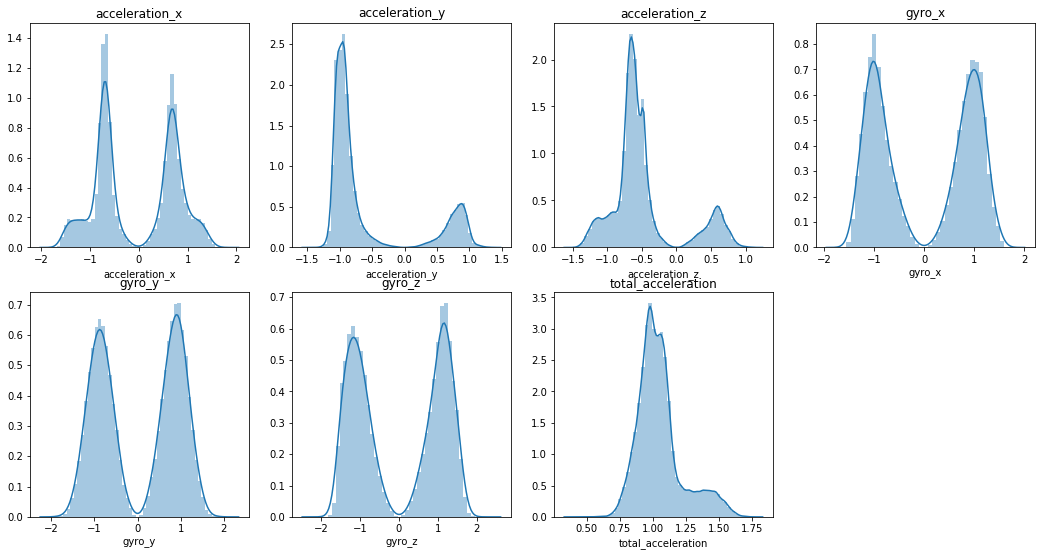

In [37]:
plt.figure(figsize=(18,19))
i=1
for x in X.columns:
    plt.subplot(4,4,i)
    sns.distplot(X[x])
    plt.title(x)
    i+=1

In [32]:
# Taking Cuberoot Transformation
X = np.cbrt(X)

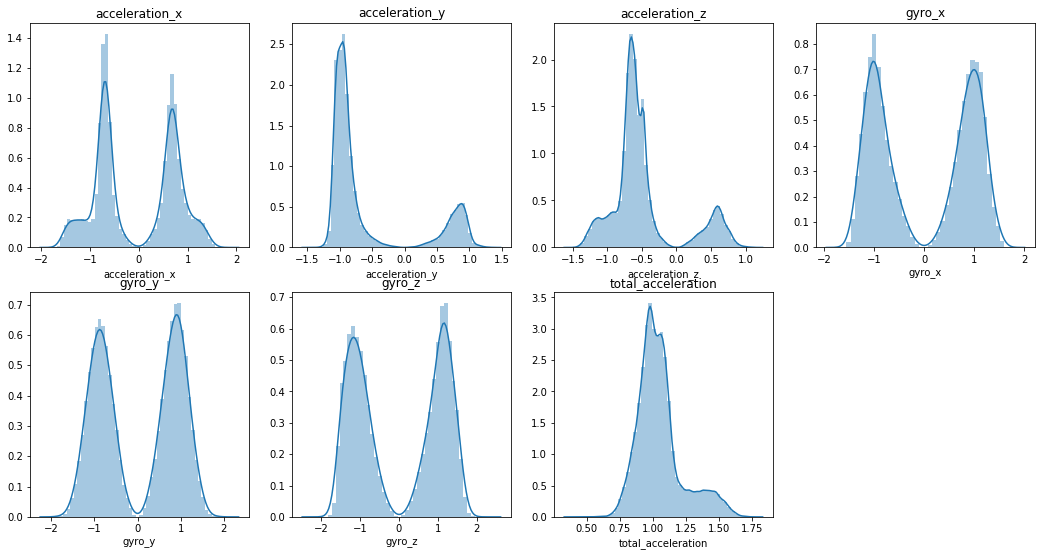

In [36]:
plt.figure(figsize=(18,19))
i=1
for x in X.columns:
    plt.subplot(4,4,i)
    sns.distplot(X[x])
    plt.title(x)
    i+=1

**Scaling**

In [38]:
from sklearn.preprocessing import StandardScaler


In [39]:
s = StandardScaler()
X = s.fit_transform(X)
X

array([[ 0.83135504, -0.49557968,  0.55924134, ...,  0.31056628,
        -1.27870498, -0.6550531 ],
       [ 1.11486163, -0.66181083, -0.28235723, ...,  0.26293233,
         0.43974795,  0.27558392],
       [ 0.97478213, -0.80288126,  1.78769792, ...,  0.47749369,
        -1.20295698,  0.60314055],
       ...,
       [ 0.98774393, -0.68511623, -0.36198388, ..., -0.73982453,
        -0.96731478,  0.22037903],
       [ 0.82542864, -0.53661128,  0.10476679, ...,  0.79712189,
        -1.08317917, -0.49731618],
       [ 0.87669745, -0.5061896 ,  0.05153661, ...,  1.07557997,
         0.95850351, -0.56959588]])

**Splitting the data**

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

In [42]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape


((66441, 7), (22147, 7), (66441,), (22147,))

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
Y_pred = lr.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(Y_test,Y_pred))


[[10722   318]
 [  673 10434]]


In [46]:
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.94      0.97      0.96     11040
           1       0.97      0.94      0.95     11107

    accuracy                           0.96     22147
   macro avg       0.96      0.96      0.96     22147
weighted avg       0.96      0.96      0.96     22147



In [47]:
lracc = accuracy_score(Y_test,Y_pred)
print(lracc)

0.9552535332099156


## Decision Tree 

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(splitter='best',criterion='entropy',min_samples_split=3,min_samples_leaf=3)
dt.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
Y_pred = dt.predict(X_test)


In [50]:
print(confusion_matrix(Y_test,Y_pred))


[[10866   174]
 [  184 10923]]


In [51]:
print(classification_report(Y_test,Y_pred))
dtacc = accuracy_score(Y_test,Y_pred)
print(dtacc)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11040
           1       0.98      0.98      0.98     11107

    accuracy                           0.98     22147
   macro avg       0.98      0.98      0.98     22147
weighted avg       0.98      0.98      0.98     22147

0.983835282431029


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',criterion='entropy')
rf.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
Y_pred = rf.predict(X_test)


In [54]:
print(confusion_matrix(Y_test,Y_pred))


[[10929   111]
 [  112 10995]]


In [55]:
print(classification_report(Y_test,Y_pred))
rfacc = accuracy_score(Y_test,Y_pred)
print(rfacc)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147

0.9899309161511717


## Model Comparision

In [58]:
models = pd.DataFrame([lracc,dtacc,rfacc],
             index=['Logistic Regression','Decision Tree','Random Forest'],columns=['Accuracy'])

In [59]:
models

,Accuracy
Logistic Regression,0.955254
Decision Tree,0.983835
Random Forest,0.989931


In [60]:
models.Accuracy.sort_values(ascending=False).values

array([0.98993092, 0.98383528, 0.95525353])

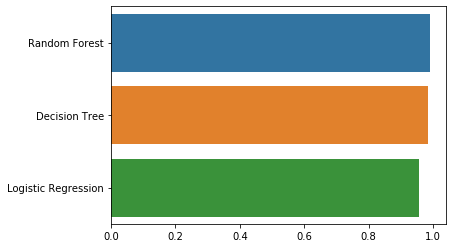

In [62]:
sns.barplot(x=models.Accuracy.sort_values(ascending=False).values,y = models.Accuracy.sort_values(ascending=False).index)
plt.show()